# About the Data
---
The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The datasets are made available to public for the purpose of health data analysis. The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single dataset. On initial visual inspection of the data showed some missing values. As the datasets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo,Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model dataset. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors.

---


# The data-set aims to answer the following key questions:

- Does various predicting factors which has been chosen initially really affect the Life expectancy?
- What are the predicting variables actually affecting the life expectancy?
- Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?

- How does Infant and Adult mortality rates affect life expectancy?
- Does Life Expectancy has positive or negative correlation with eating habits, - lifestyle, exercise, smoking, drinking alcohol etc.
- What is the impact of schooling on the lifespan of humans?
- Does Life Expectancy have positive or negative relationship with drinking alcohol?
- Do densely populated countries tend to have lower life expectancy?
- What is the impact of Immunization coverage on life Expectancy?

# Importing Modules

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import random
# data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# data modeling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
# evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# Reading Data

In [2]:
url = '../input/life-expectancy-who/Life Expectancy Data.csv'
data = pd.read_csv(url)

# Displaying Data

In [3]:
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


# Columns Meaning
- Country: Country
- Year: Year
- Status: Country Developed or Developing status
- Life expectancy: Life expectancy in age
- Adult Mortality: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
- infant deaths: Number of Infant Deaths per 1000 population
- Alcohol: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
-percentage expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
- Hepatitis B: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
- Measles: Measles - number of reported cases per 1000 population
- BMI: Average Body Mass Index of entire population
- under-five deaths: Number of under-five deaths per 1000 population
- Polio: Polio (Pol3) immunization coverage among 1-year-olds (%)
- Total expenditure: General government expenditure on health as a percentage of total government expenditure (%)
- Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
- HIV/AIDS: Deaths per 1 000 live births HIV/AIDS (0-4 years)
- GDP: Gross Domestic Product per capita (in USD)
- Population: Population of the country
- thinness 1-19 years: Prevalence of thinness among children and adolescents for Age 10 to 19 (%)
- thinness 5-9 years: Prevalence of thinness among children for Age 5 to 9(%)
- Income composition of resources: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- Schooling: Number of years of Schooling(years)

# Data Information

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

# Null-values Percentage

In [5]:
data.isnull().sum()/data.shape[0]*100

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

In [6]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
Adult Mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


In [8]:
data.describe(include="object").transpose()

,count,unique,top,freq
Country,2938,193,Afghanistan,16
Status,2938,2,Developing,2426


In [9]:
def rand_color():
  c = "#"+"".join(map(hex,random.choices(range(256), k=3))).replace("0x","")
  if len(c) != 7:
    return rand_color()
  return c

In [10]:
obj_cols = data.select_dtypes(include='object').columns.tolist()
num_cols = data.select_dtypes(exclude='object').columns.drop("Life expectancy ").tolist()

# Life Expectancy Distribution

<AxesSubplot:xlabel='Life expectancy ', ylabel='Density'>

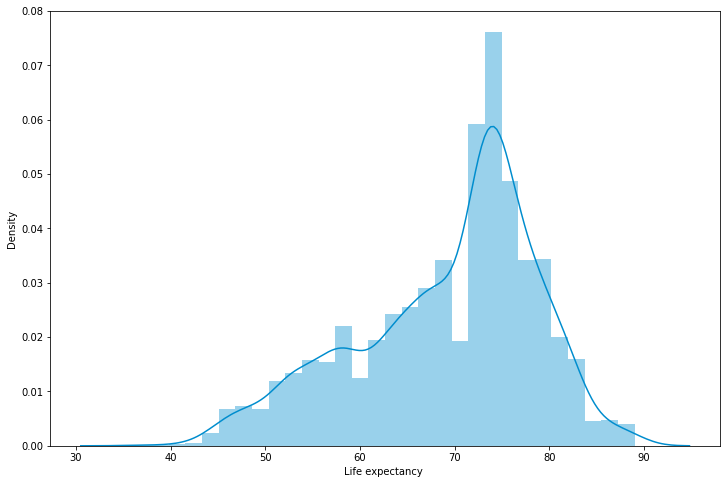

In [11]:
plt.figure(figsize=(12,8))
sns.distplot(data['Life expectancy '], color="#008dce")

# Other Distributions

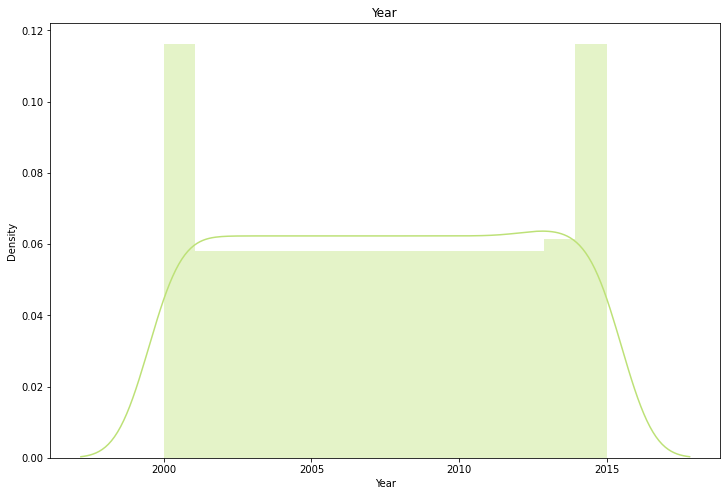

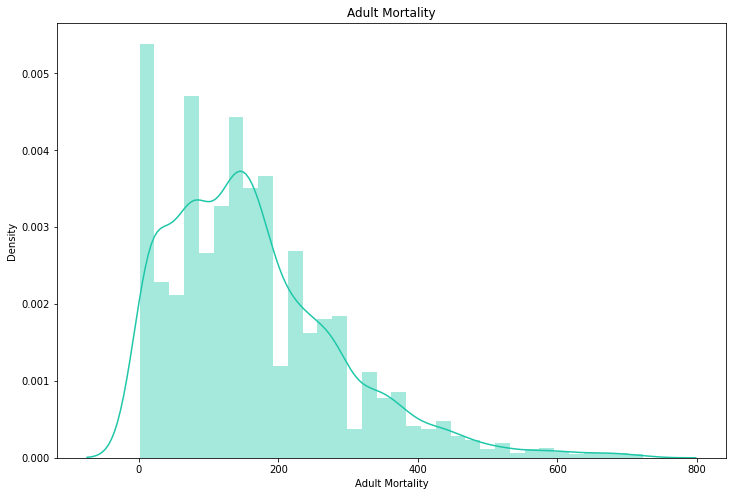

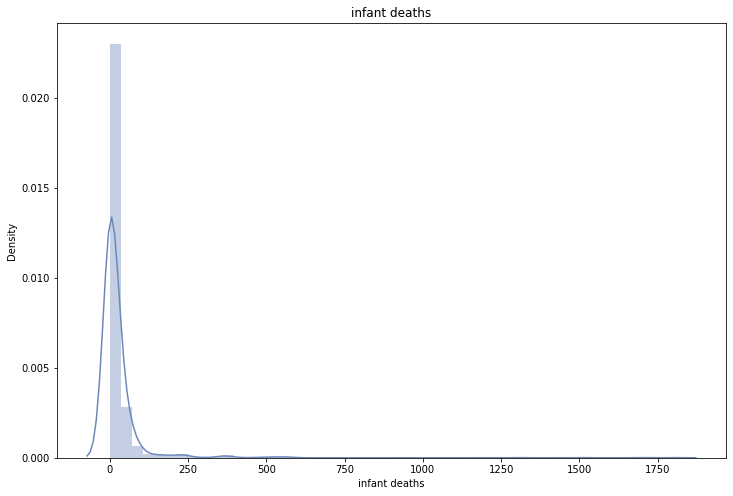

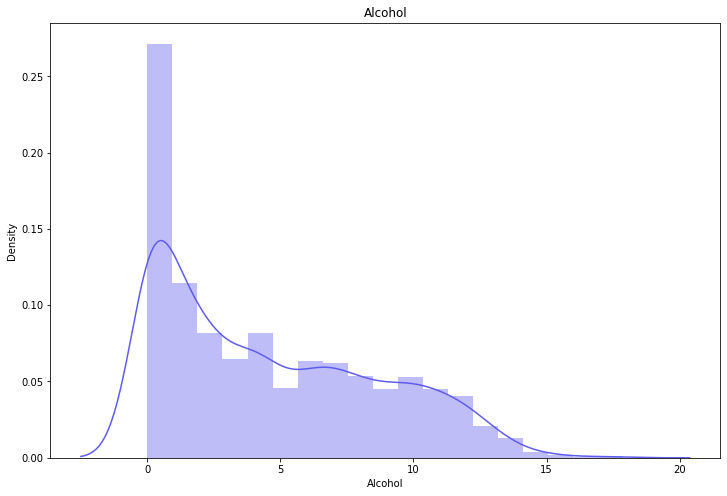

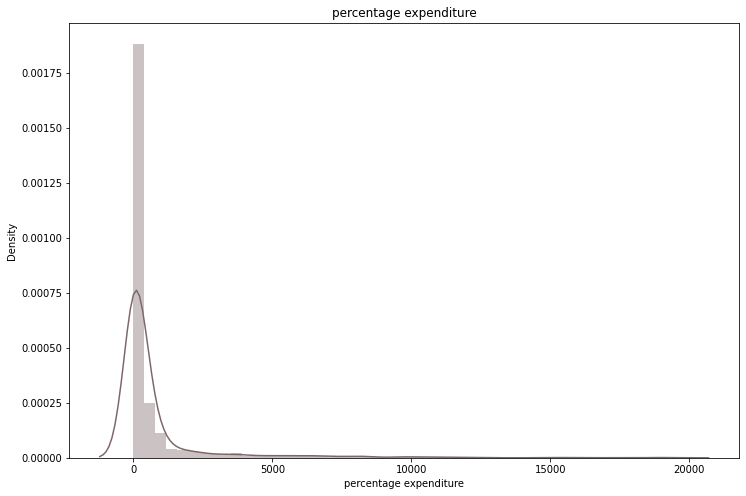

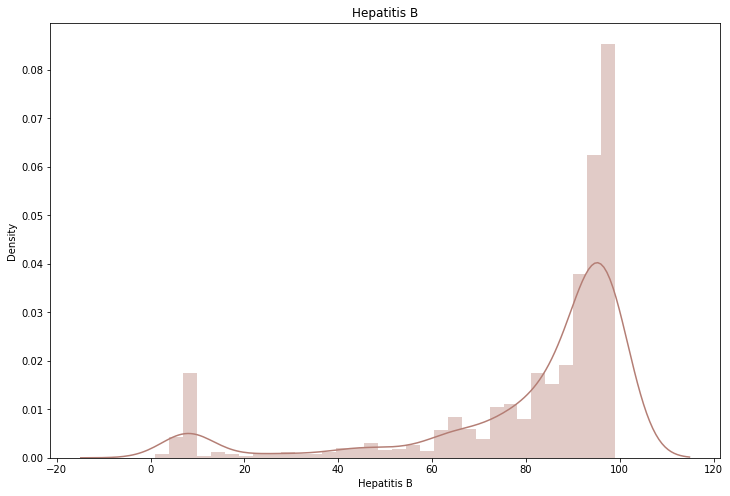

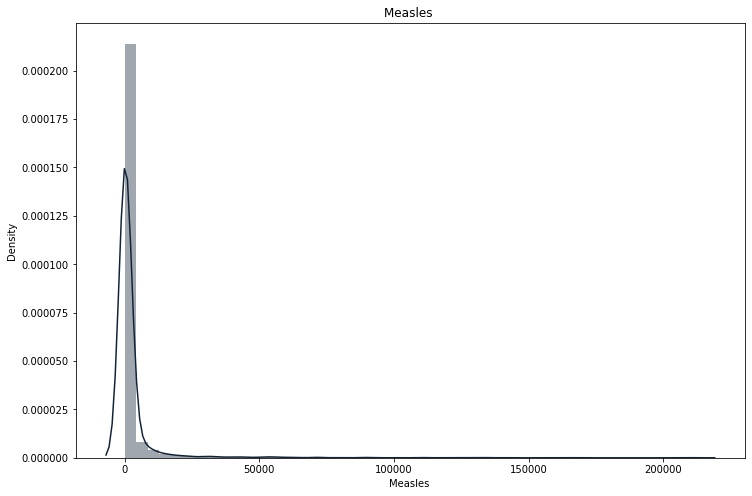

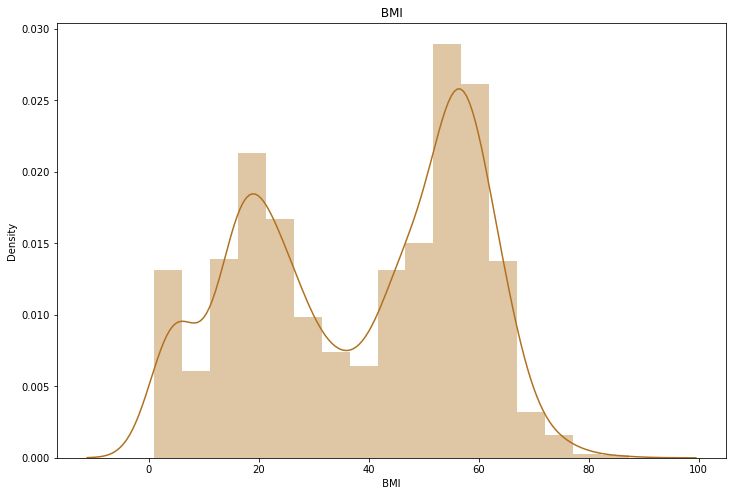

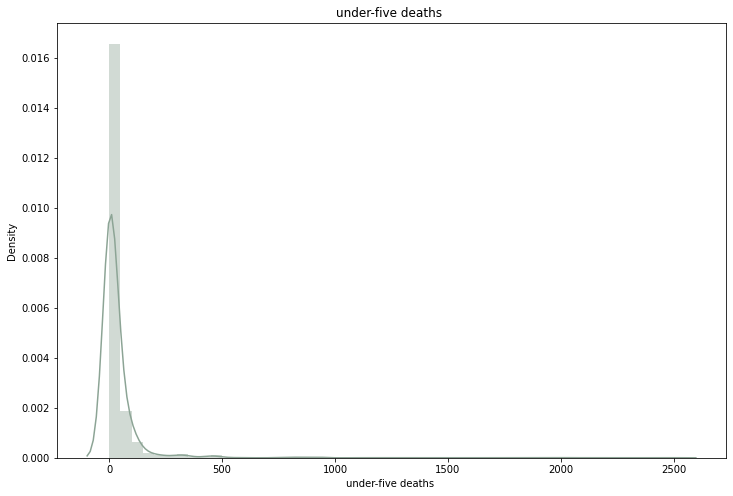

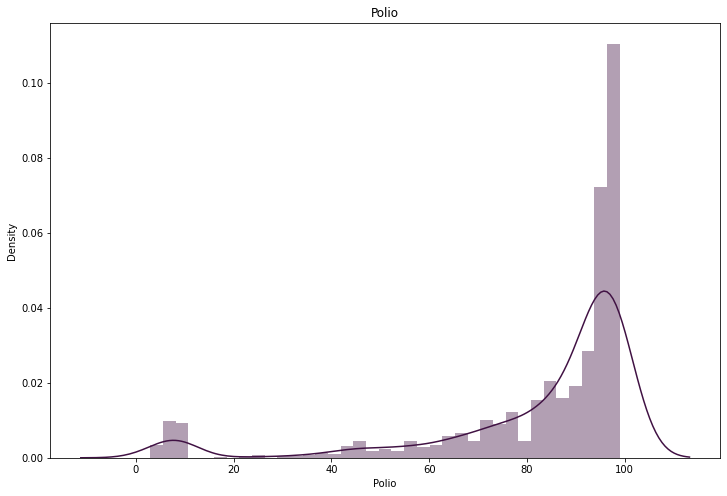

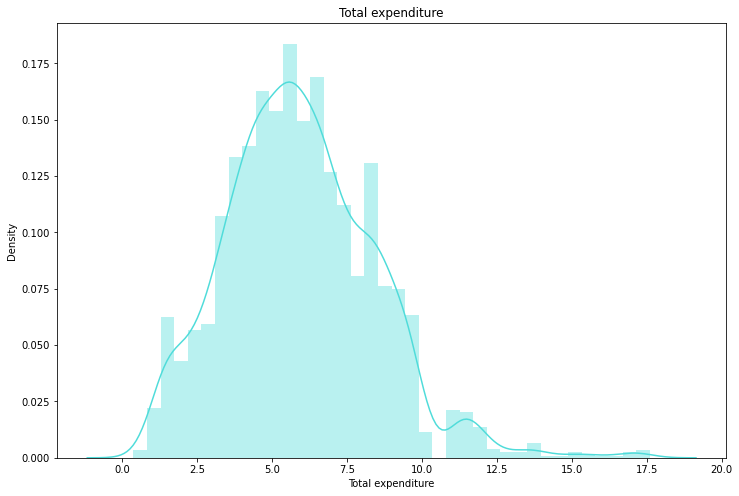

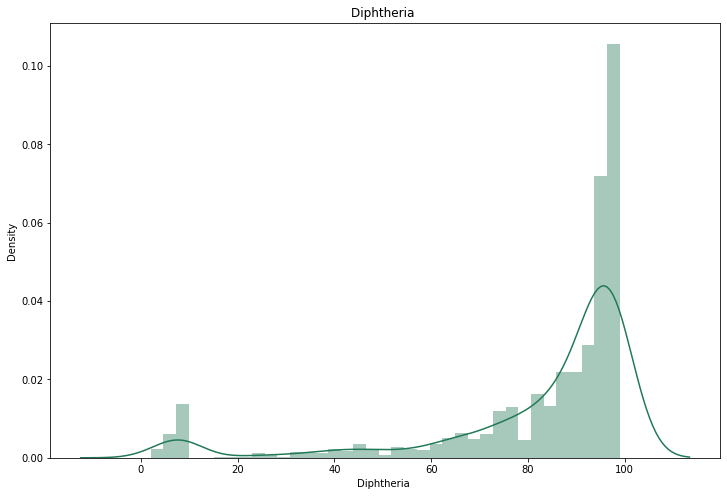

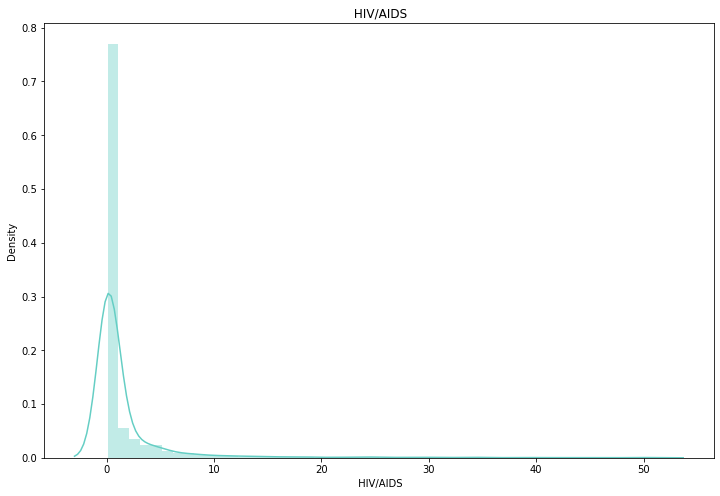

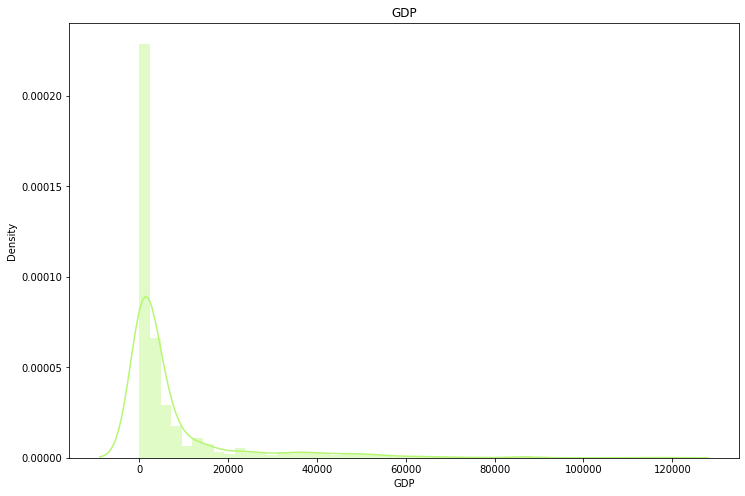

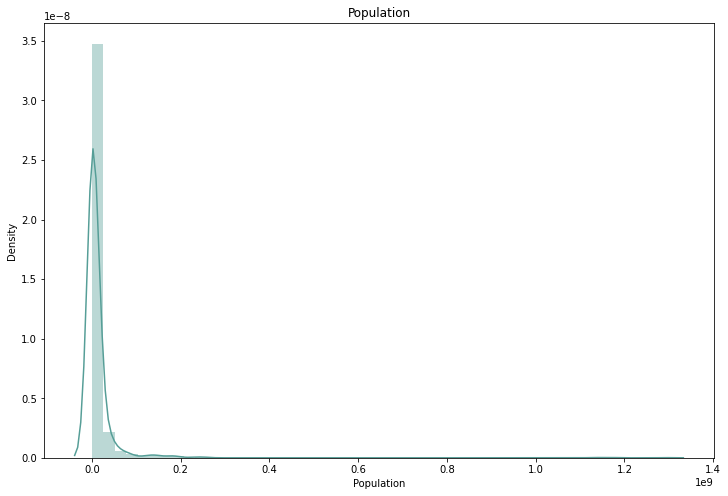

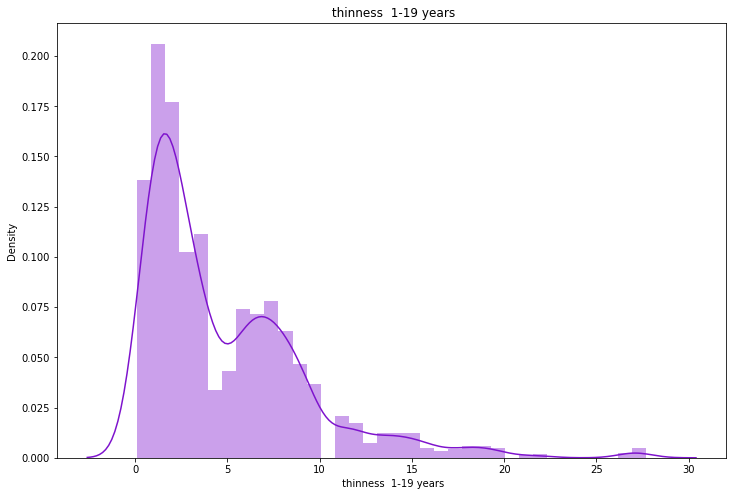

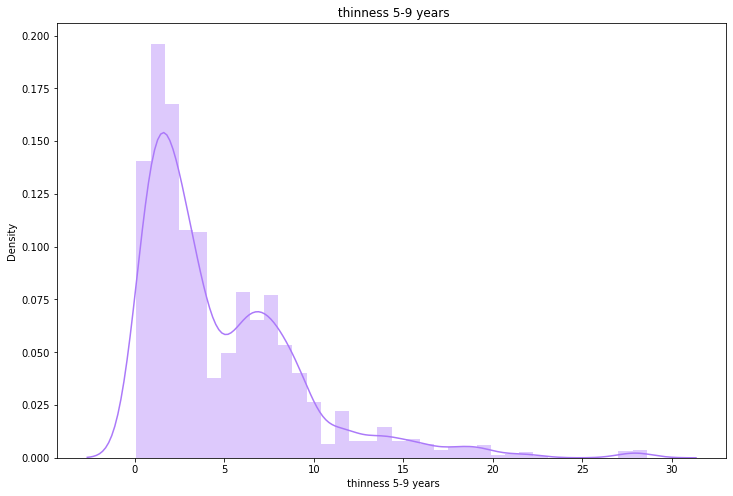

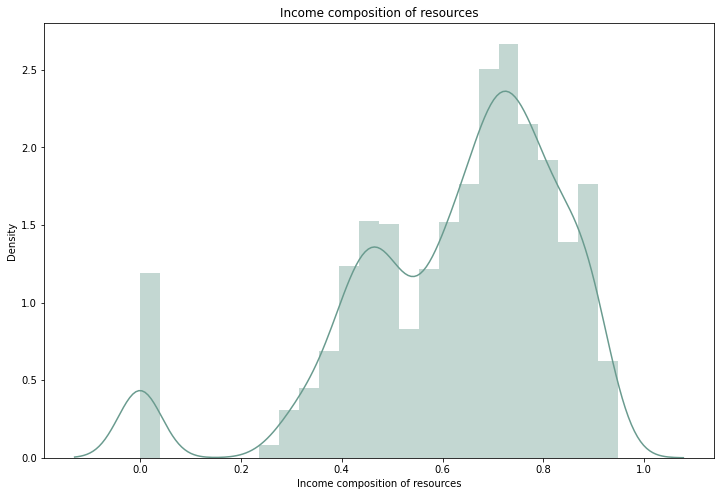

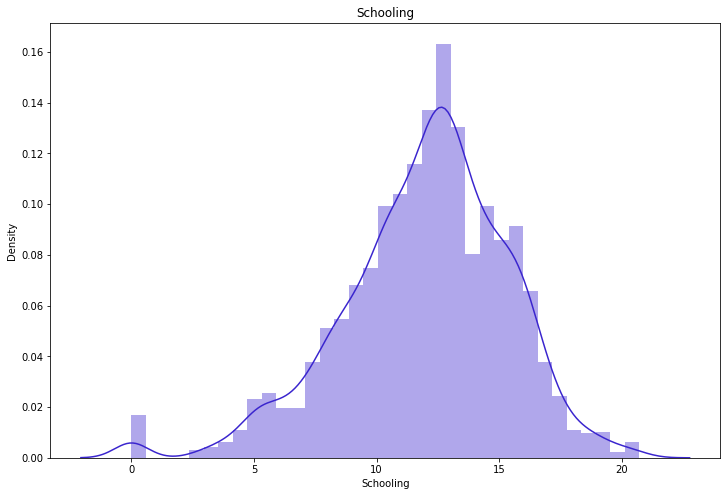

In [12]:
for i in num_cols:
  print("\n")
  plt.figure(figsize=(12,8))
  sns.distplot(data[i], color = rand_color()).set(title = i)
  plt.show()

# Country Status Count

<AxesSubplot:xlabel='count', ylabel='Status'>

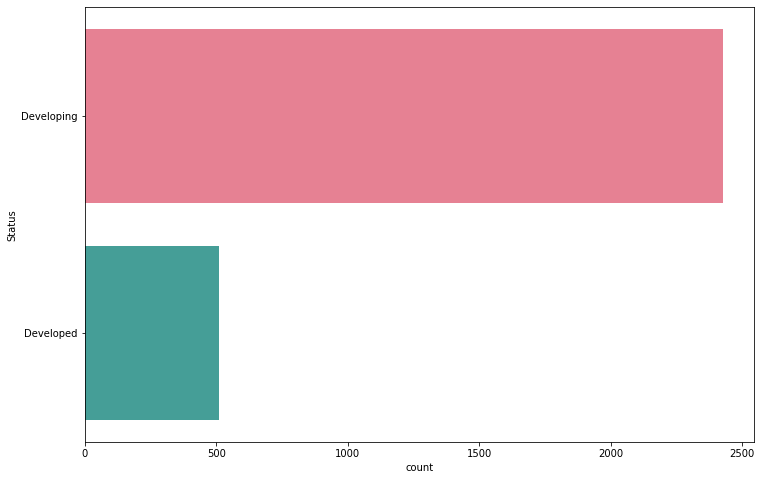

In [13]:
plt.figure(figsize=(12,8))
sns.countplot(data=data, y= 'Status', order=data["Status"].value_counts().index, palette= "husl")

# Correlation

<AxesSubplot:>

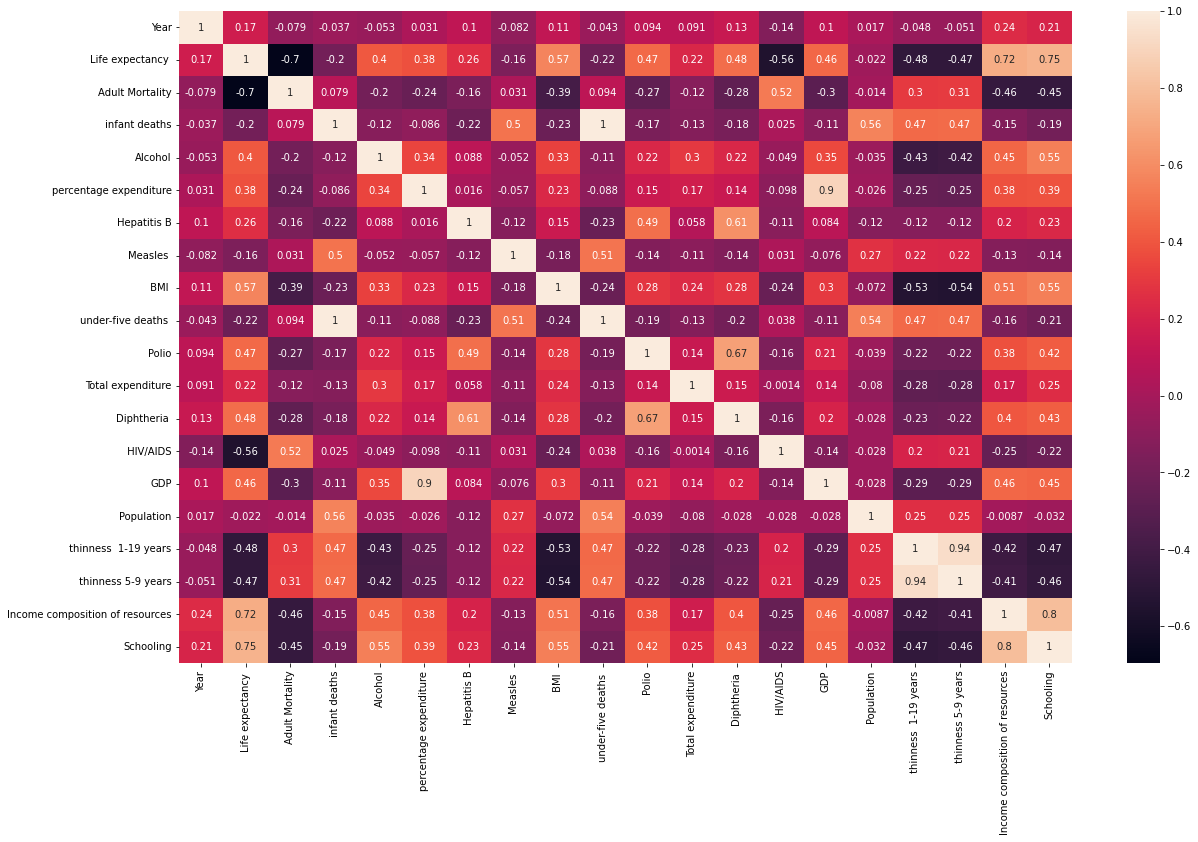

In [14]:
plt.figure(figsize=(20,12))
sns.heatmap(data.corr(),annot=True)

<AxesSubplot:>

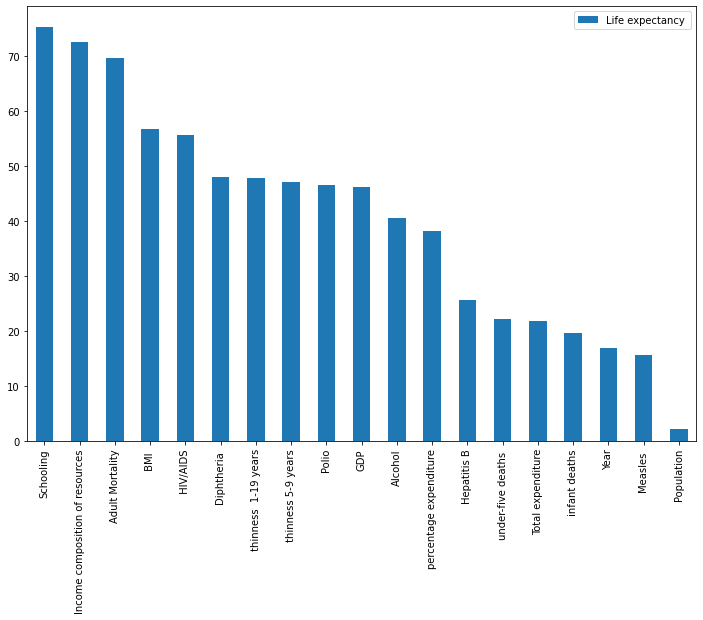

In [15]:
pd.DataFrame(abs(data.corr()['Life expectancy '].drop('Life expectancy ')*100).sort_values(ascending=False)).plot.bar(figsize = (12,8))

# Outliers

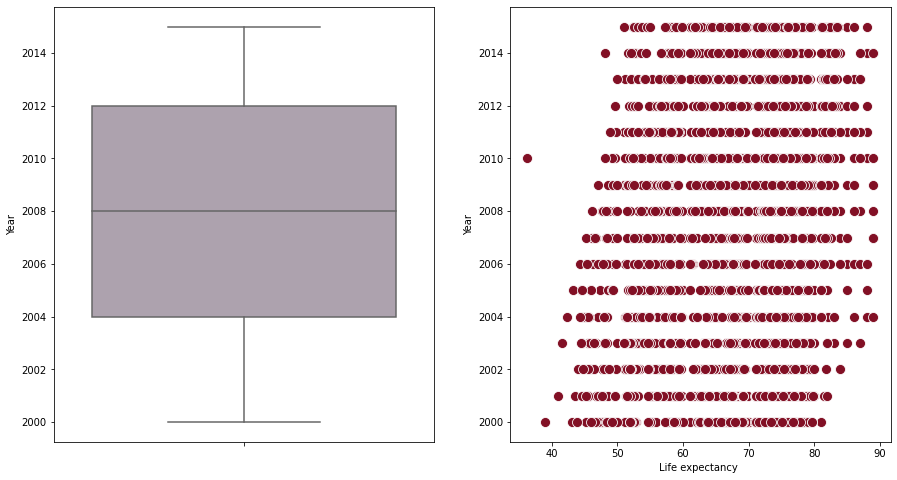

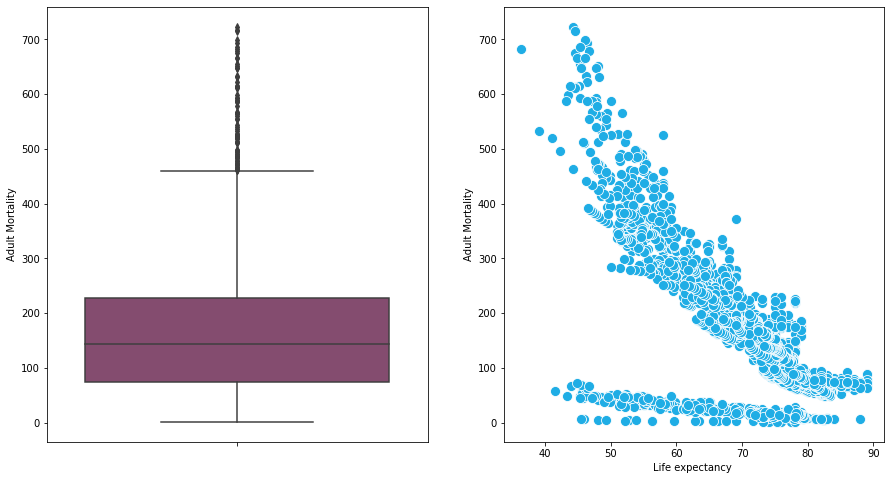

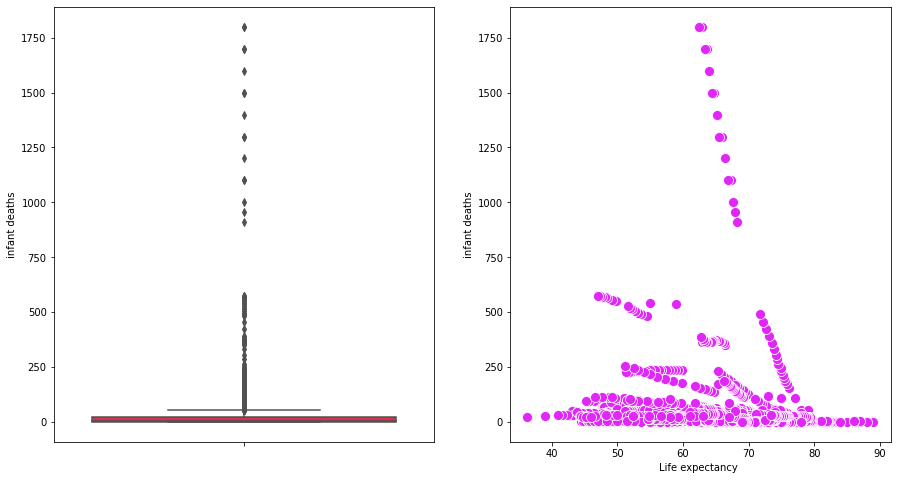

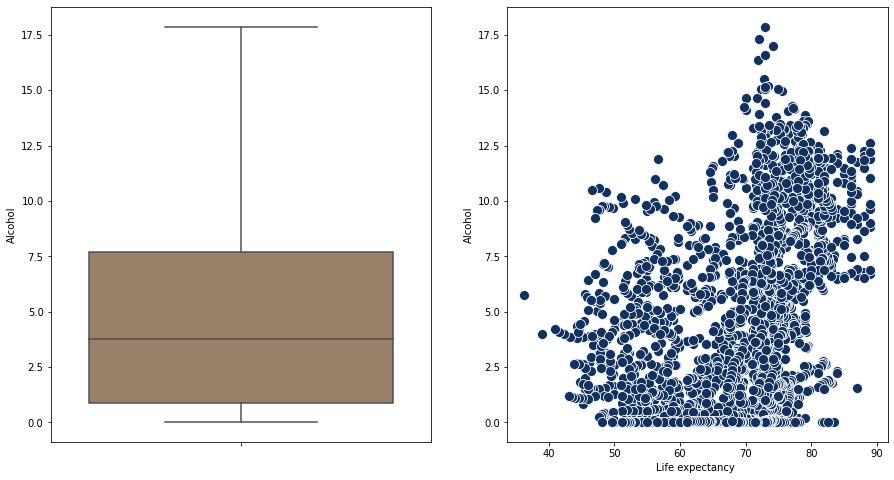

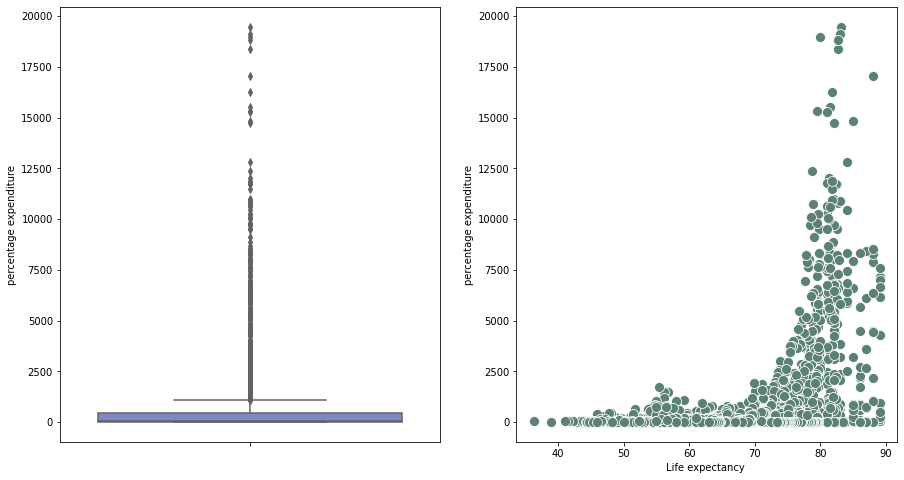

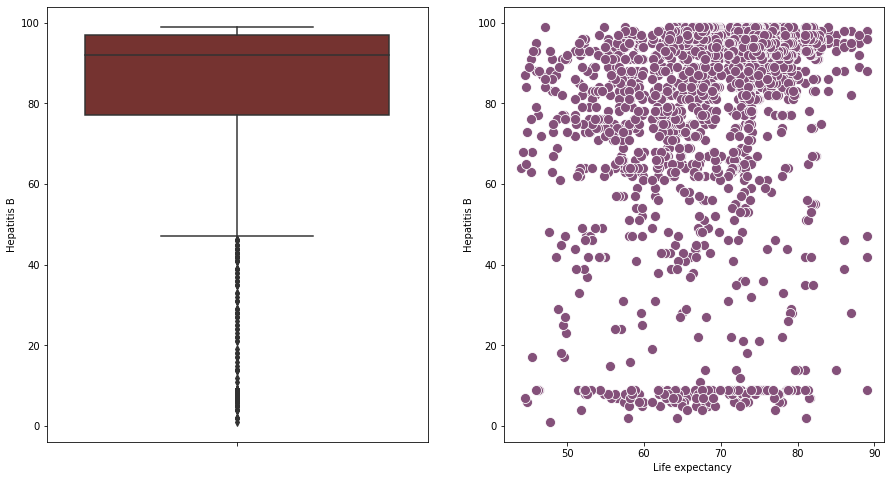

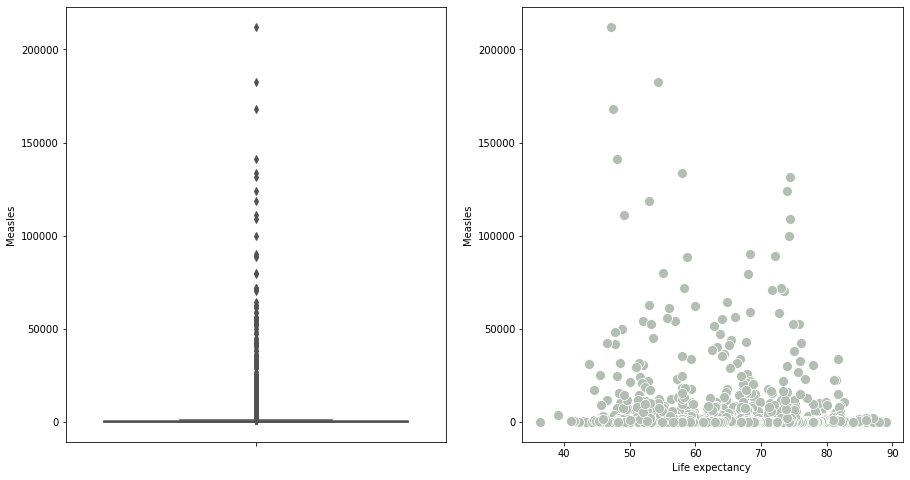

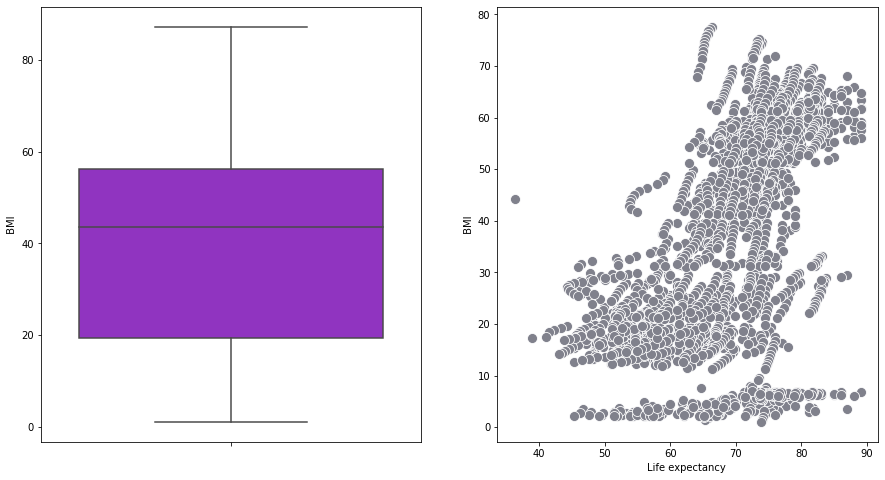

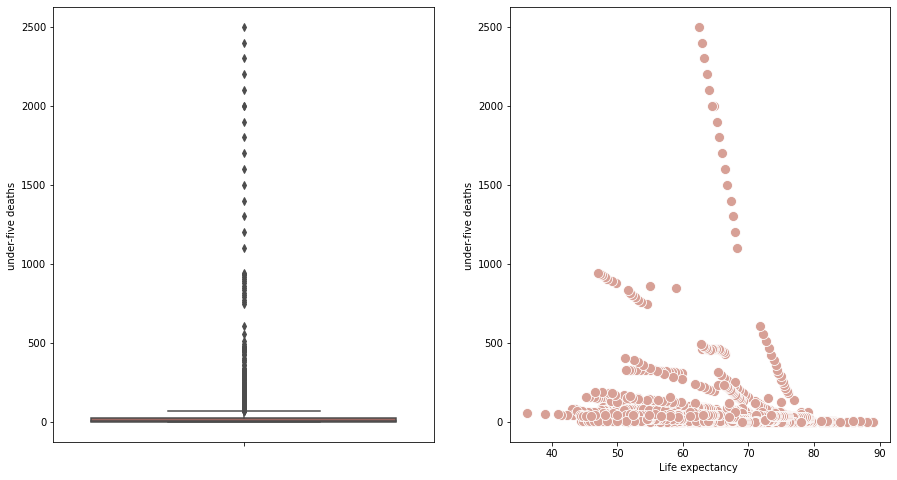

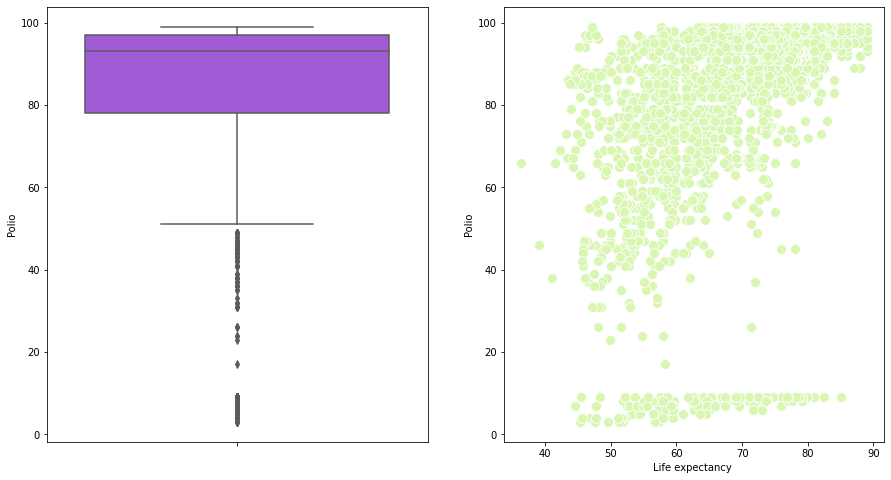

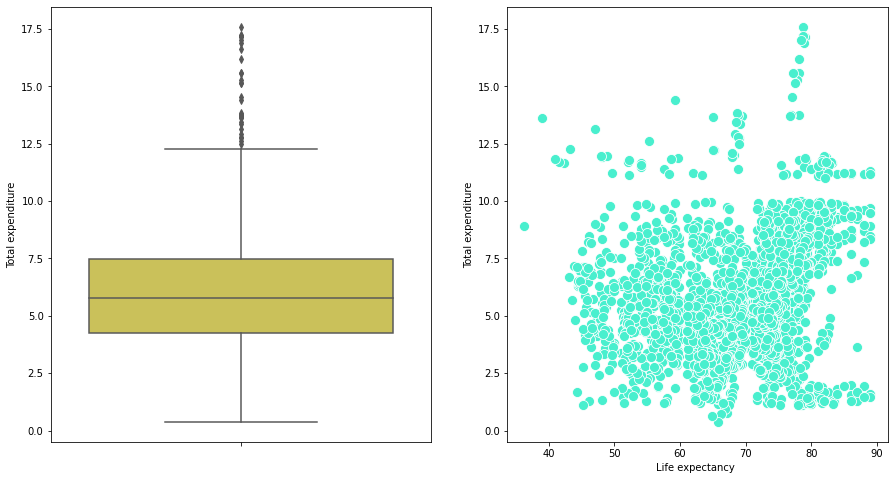

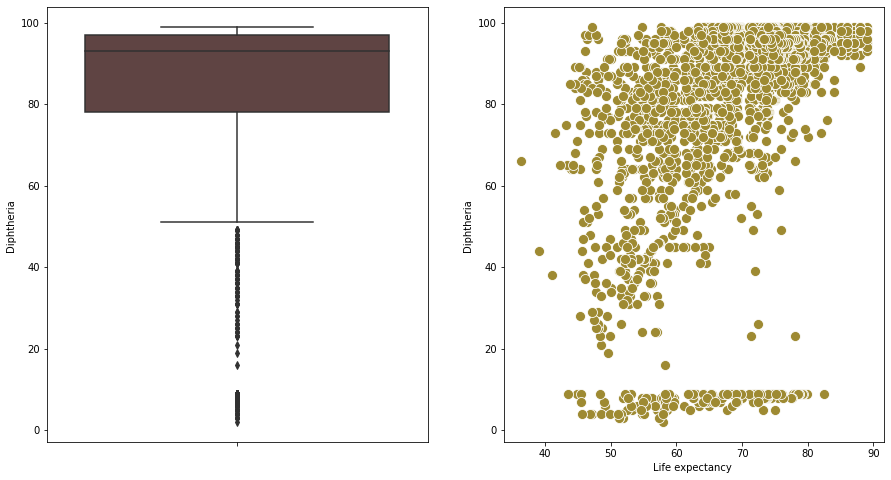

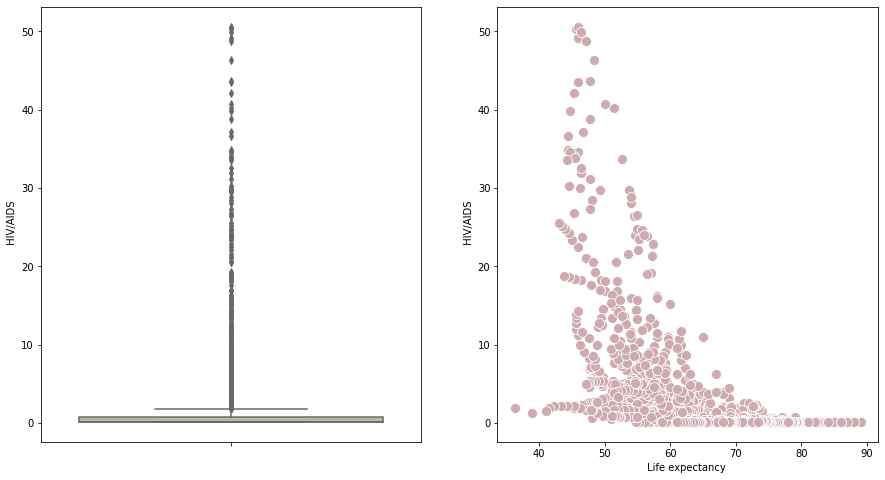

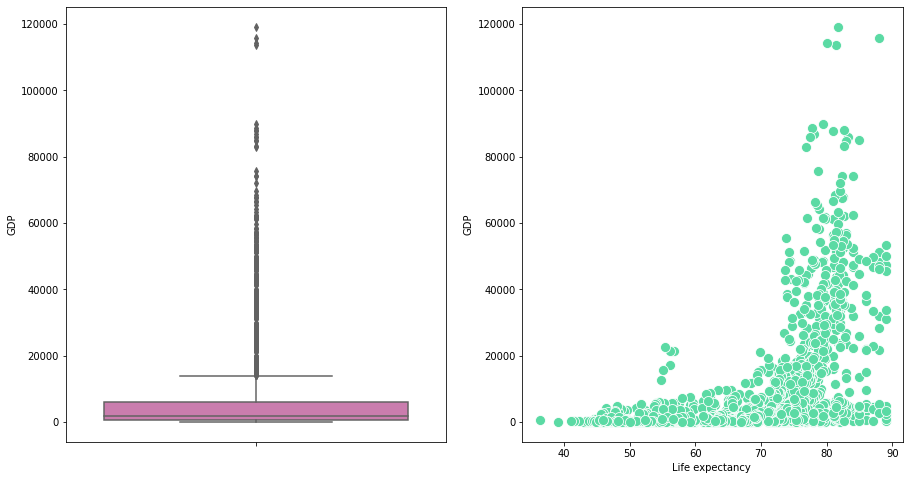

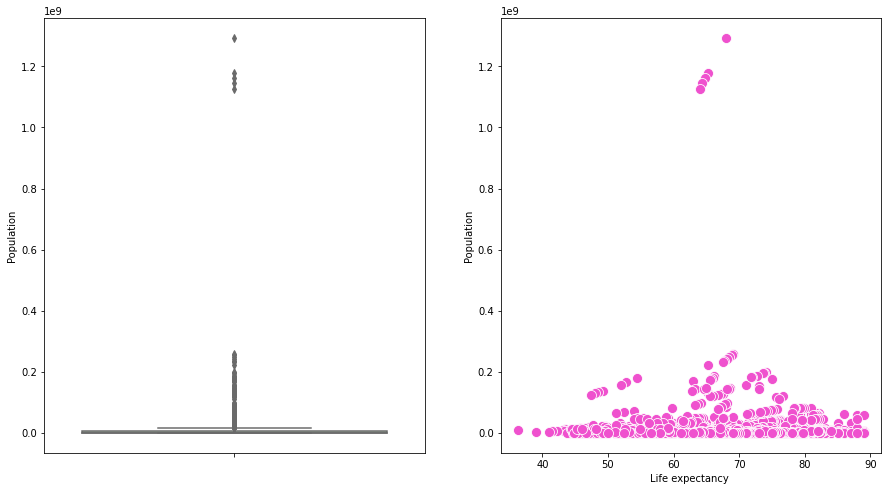

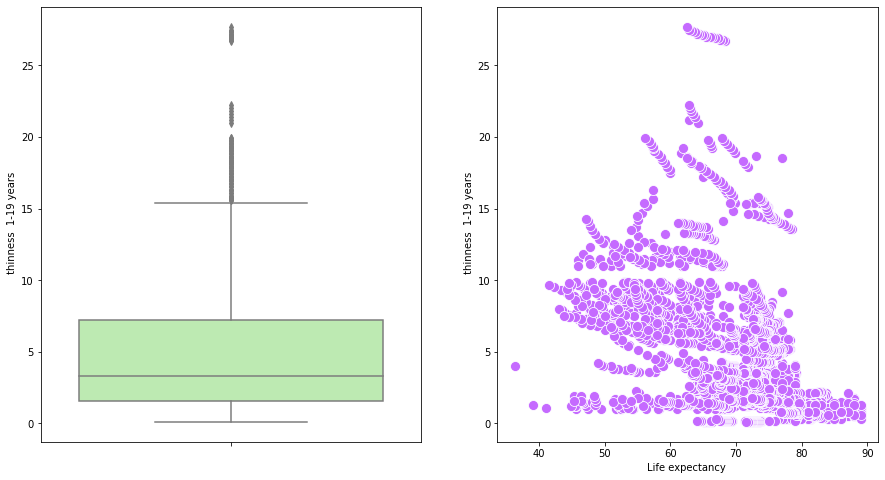

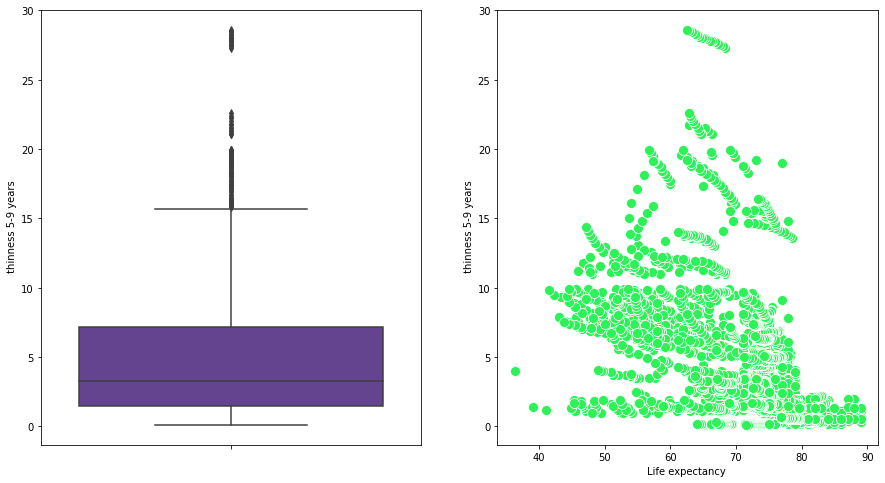

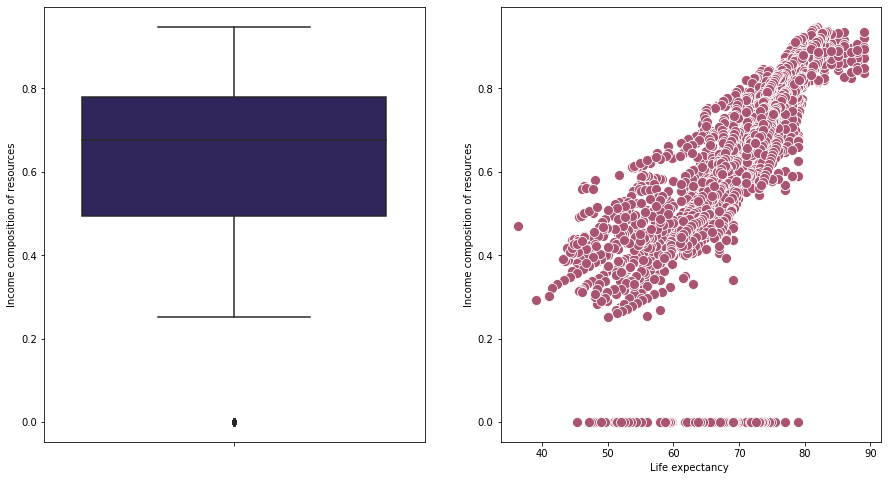

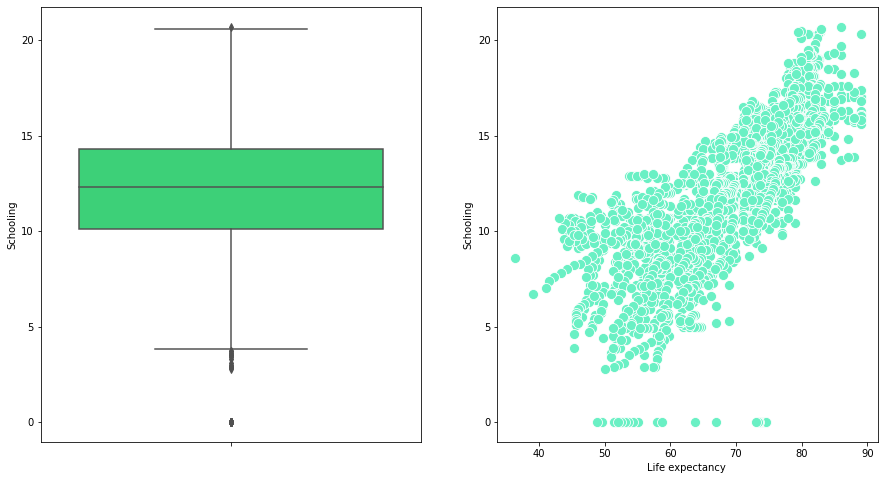

In [16]:
for col in num_cols:
    print("\n")
    fig, ax =plt.subplots(1,2, figsize=(15,8))
    sns.boxplot(data=data, y=col, ax=ax[0], color=rand_color())
    sns.scatterplot(data=data,x = 'Life expectancy ', s = 100, y=col, ax=ax[1], color = rand_color())
    plt.show()

### Outliers were not removed because they might affect the target 

# Misiing Values

In [17]:
mv_cols = ["Life expectancy ", "Adult Mortality", "Alcohol", "Hepatitis B", " BMI ", "Polio", "Total expenditure", "Diphtheria ", "GDP", "Population", " thinness  1-19 years", " thinness 5-9 years", "Income composition of resources", "Schooling"]

In [18]:
for mv in mv_cols:
  fill_list = data[mv].dropna().tolist()
  data[mv] = data[mv].fillna(pd.Series(np.random.choice(fill_list , size = len(data.index))))

In [19]:
data.isnull().sum()/data.shape[0]*100

Country                            0.0
Year                               0.0
Status                             0.0
Life expectancy                    0.0
Adult Mortality                    0.0
infant deaths                      0.0
Alcohol                            0.0
percentage expenditure             0.0
Hepatitis B                        0.0
Measles                            0.0
 BMI                               0.0
under-five deaths                  0.0
Polio                              0.0
Total expenditure                  0.0
Diphtheria                         0.0
 HIV/AIDS                          0.0
GDP                                0.0
Population                         0.0
 thinness  1-19 years              0.0
 thinness 5-9 years                0.0
Income composition of resources    0.0
Schooling                          0.0
dtype: float64

# Encodeing Data

In [20]:
status_le = LabelEncoder()
country_le = LabelEncoder()

In [21]:
data['Status'] = status_le.fit_transform(data['Status'])
data['Country'] = country_le.fit_transform(data['Country'])

# Spliting Data

In [22]:
x = data.drop('Life expectancy ',axis=1)
y = data['Life expectancy ']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Scalling Data

In [24]:
scaler = MinMaxScaler()

In [25]:
x_train_scaled = scaler.fit_transform(x_train)

In [26]:
x_test_scaled = scaler.transform(x_test)

In [27]:
x_train_scaled.shape

(2203, 21)

# Modeling

In [28]:
model = Sequential()

model.add(Dense(28,input_shape=(21,),activation='relu', kernel_regularizer=regularizers.L1L2(l1=1e-3, l2=1e-2),
    bias_regularizer=regularizers.L2(1e-3),
    activity_regularizer=regularizers.L2(1e-4)))

#Hidden Layer
model.add(Dense(56,activation='relu'))
model.add(Dense(42,activation='relu'))
model.add(Dense(35,activation='relu'))
model.add(Dense(20,activation='relu'))

#Output layer

model.add(Dense(1))


2022-10-14 17:30:56.285768: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [29]:
model.compile(optimizer='Adam',loss='mse',metrics=['mae'])

In [30]:
model.fit(x=x_train_scaled,y=y_train.values,validation_data=(x_test_scaled,y_test.values),batch_size=128,epochs=600)

2022-10-14 17:30:56.756941: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/600
18/18 [==============================] - 1s 21ms/step - loss: 4818.1343 - mae: 68.7549 - val_loss: 4658.8594 - val_mae: 67.5952
Epoch 2/600
18/18 [==============================] - 0s 6ms/step - loss: 4533.6270 - mae: 66.6540 - val_loss: 4117.0747 - val_mae: 63.4872
Epoch 3/600
18/18 [==============================] - 0s 7ms/step - loss: 3495.8401 - mae: 58.2581 - val_loss: 2254.3792 - val_mae: 46.6788
Epoch 4/600
18/18 [==============================] - 0s 5ms/step - loss: 998.9214 - mae: 27.4166 - val_loss: 126.0092 - val_mae: 8.8852
Epoch 5/600
18/18 [==============================] - 0s 6ms/step - loss: 179.8409 - mae: 10.6049 - val_loss: 89.3578 - val_mae: 7.3768
Epoch 6/600
18/18 [==============================] - 0s 6ms/step - loss: 100.4914 - mae: 7.8301 - val_loss: 74.4897 - val_mae: 6.5826
Epoch 7/600
18/18 [==============================] - 0s 6ms/step - loss: 81.7390 - mae: 6.8947 - val_loss: 67.6367 - val_mae: 6.2463
Epoch 8/600
18/18 [=========================

# Evaluation

In [31]:
losses=pd.DataFrame(model.history.history)
losses.head()

,loss,mae,val_loss,val_mae
0,4818.134277,68.754852,4658.859375,67.595215
1,4533.626953,66.654022,4117.074707,63.487160
2,3495.840088,58.258121,2254.379150,46.678848
3,998.921448,27.416567,126.009247,8.885172
4,179.840927,10.604909,89.357788,7.376847


<AxesSubplot:>

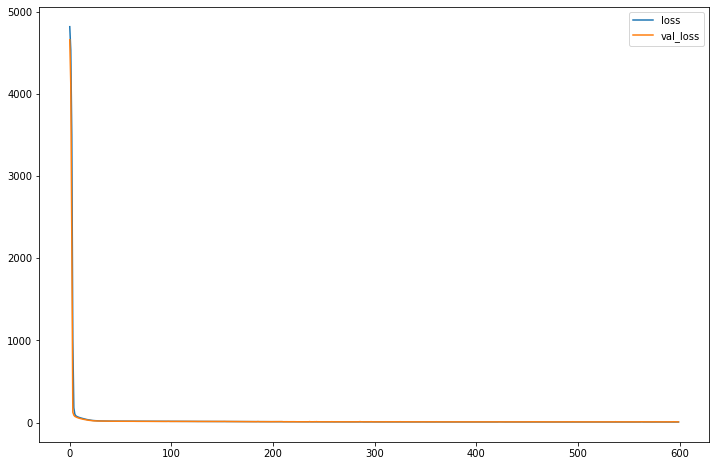

In [32]:
losses[['loss','val_loss']].plot(figsize=(12,8))

<AxesSubplot:>

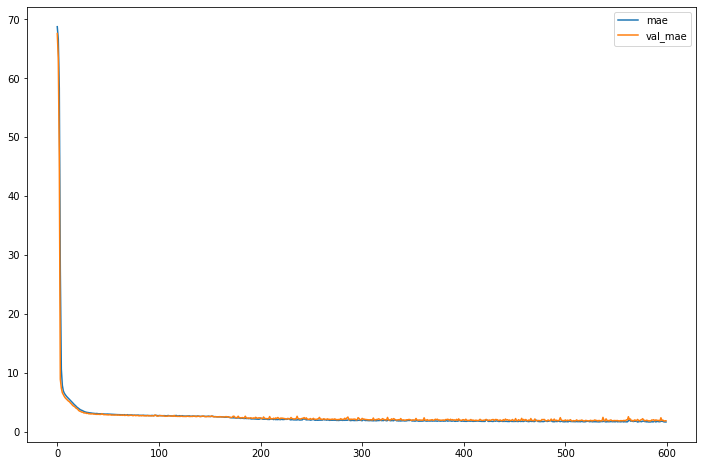

In [33]:
losses[['mae','val_mae']].plot(figsize=(12,8))

In [34]:
predictions = model.predict(x_test_scaled)

In [35]:
mean_abs_error = mean_absolute_error(predictions,y_test)
mean_abs_error

1.8343179767634596

In [36]:
np.sqrt(mean_squared_error(y_test,predictions))

2.6720811464899885

In [37]:
model.evaluate(x_test_scaled,y_test)

23/23 [==============================] - 0s 2ms/step - loss: 7.5802 - mae: 1.8343


[7.5802154541015625, 1.834317922592163]

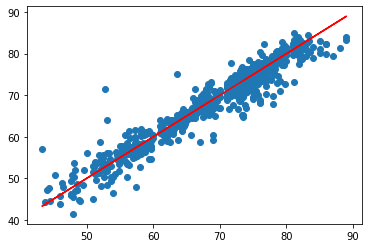

In [38]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')